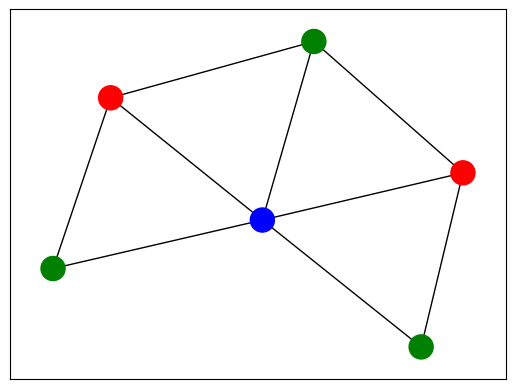

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

graph_dict = {0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 5], 3: [0, 1, 2, 4, 5], 4: [1, 3], 5: [2, 3]}

graph = nx.Graph(graph_dict)

color_map = ['green', 'red', 'red', 'blue', 'green', 'green']

layout = nx.kamada_kawai_layout(graph)

nx.draw_networkx(graph, node_color=color_map, with_labels=False, pos=layout)
plt.show()


# Алгоритм полного перебора

Генерируем все возможные раскраски и проверяем правильность каждой.

Для проверки правильности раскраски необходимо просто обойти граф, следовательно сложность проверки $-$ линейная.

При этом всего раскрасок необходимо проверить $3^n$, где $n$ $-$ число вершин в графе.

Таким образом сложность переборного алгоритма $-$ $O(3^nn)$

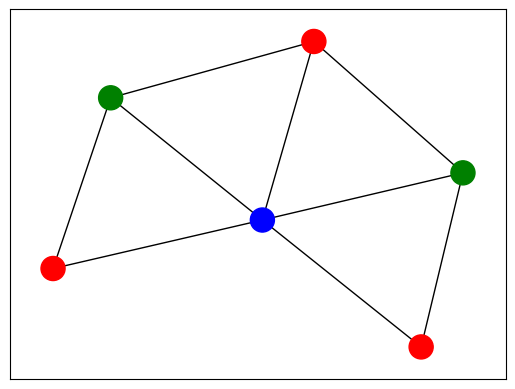

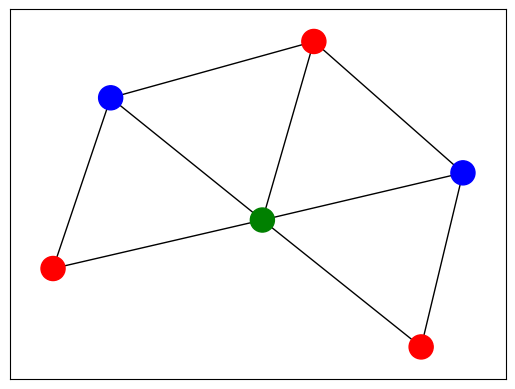

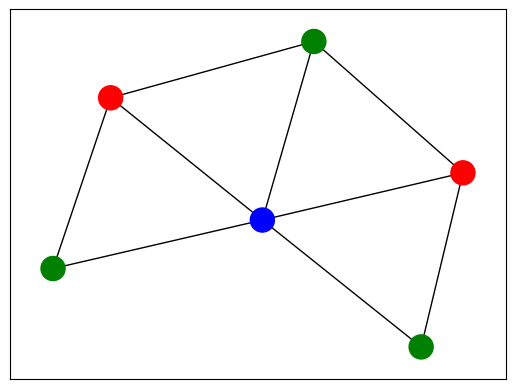

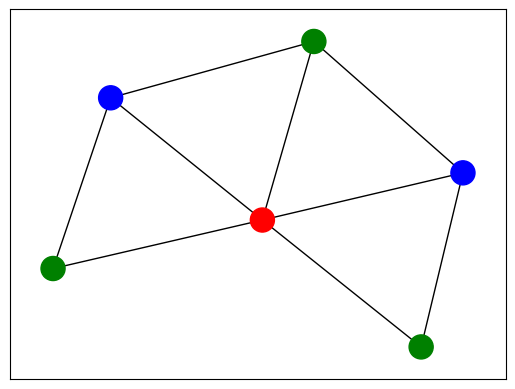

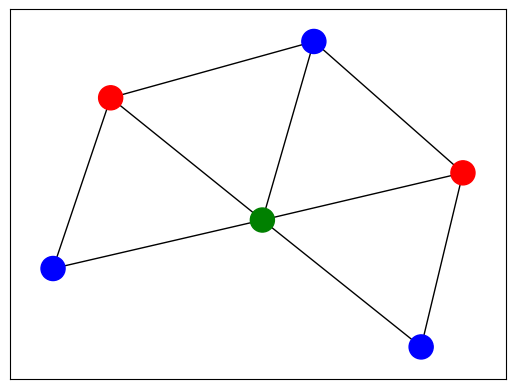

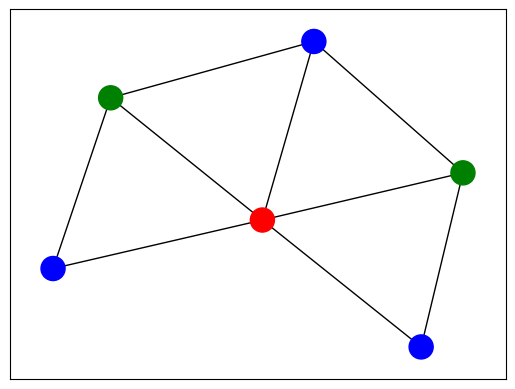

In [2]:
from itertools import product

def is_right_coloring(graph, coloring):
    queue = []
    queue.append(0)
    looked_nodes = set()
    
    while len(queue) != 0:
        current_element = queue[0]
        queue.pop(0)
        if current_element in looked_nodes:
            continue
        looked_nodes.add(current_element)
        for neightbour_element in graph[current_element]:
            if coloring[current_element] == coloring[neightbour_element]:
                return False
            queue.append(neightbour_element)
    return True

for color_map in product(['red', 'green', 'blue'], repeat=len(graph_dict.keys())):
    if is_right_coloring(graph_dict, color_map):
        nx.draw_networkx(graph, node_color=color_map, with_labels=False, pos=layout)
        plt.show()
    

# Перебор с учетом выбора только из 2-ух цветов.

Производим учет цвета текущей вершины, обходим граф и для каждой следующей вершины выбираем один из двух цветов, отличных от цвета текущей вершины.

Так как на каждом шаге производим выбор одного из двух цветов, то необходимо рассмотреть $2^n$, таким образом итоговая сложность $O(2^nn)$

# Перебор подмножеств размера $\leq {n \over 3}$.

**Утверждение.** Если раздить множество вершин на 3 множества (все вершины каждого множества раскрашены в один и тот же цвет) то всегда будет существовать множество размера $\leq {n \over 3}$.

Если известно одно из таких множеств (к примеру минимальное), то итоговоую раскраску можно получить за один обход графа, последовательно производя покраску в один из свободных цветов.

Таким образом перебрав все подмножества вершин размера $\leq {n \over 3}$ можно узнать, верное ли было выбрано множество за линейное время.

Количество всех вохможных множеств:
$$C_n^0 + C_n^1 + C_n^2 + ... + C_n^{\lfloor {n \over 3} \rfloor} \leq \lfloor {n \over 3} \rfloor C_n^{\lfloor {n \over 3} \rfloor} \approx 1,9^n$$

Таким образом итоговая сложность $O(1,9^nn)$

# Вероятностный алгоритм. Сведение к задаче выполнимости логических формул.

Назовем вершины $a, b, c, ...$.

Каждой вершине $a$ соответствует три цвета: $a_1, a_2, a_3$.

Сформулируем логические формулы, которые описывают правильную раскраску графа:

- Вершина должна быть покрашена хотя бы в один цвет 
$$ (a_1 \lor a_2 \lor a_3) \land (b_1 \lor b_2 \lor b_3) \land ... $$

- Каждая вершина покрашена только в один цвет
$$ (\overline{a_1} \lor \overline{a_2}) \land (\overline{a_1} \lor \overline{a_3}) \land (\overline{a_2} \lor \overline{a_3}) \land (\overline{b_1} \lor \overline{b_2}) \land ... $$

- Соседние вершины покрашены в разные цвета (если $a$ и $b$ соседние)
$$ (\overline{a_1} \lor \overline{b_1}) \land (\overline{a_2} \lor \overline{b_2}) \land (\overline{a_3} \lor \overline{b_3}) \land ... $$

Случайным образом запретим каждой вершине быть покрашенной в один из 3-х цветов, таким образом в представленных булевых формулах будет заранее определено значение части переменных (пусть вершина $a$ не может быть покрашена в цвет 2, вершина $b$ $-$ в цвет 1):

- Вершина должна быть покрашена хотя бы в один цвет 
$$ (a_1 \lor a_3) \land (b_2 \lor b_3) \land ... $$

- Каждая вершина покрашена только в один цвет
$$ (\overline{a_1} \lor \overline{a_3}) \land (\overline{b_2} \lor \overline{b_3}) \land ... $$

- Соседние вершины покрашены в разные цвета (если $a$ и $b$ соседние)
$$ (\overline{a_3} \lor \overline{b_3}) \land ... $$

Получившаяся задача решается за линейное время сведением к графовой задаче.
Каждый коньюнкт порождает две дуги в ориентированном графе:

$$ a \lor b = \overline{a} \rightarrow b = \overline{b} \rightarrow a $$



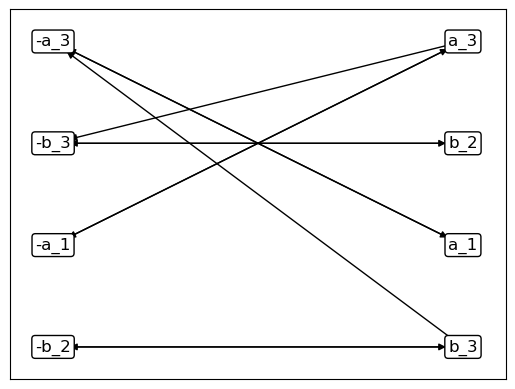

In [3]:
graph_dict = {
    '-a_1': ['a_3'],
    '-a_3': ['a_1'],
    '-b_2': ['b_3'],
    '-b_3': ['b_2'],
    'a_1': ['-a_3'],
    'a_3': ['-a_1', '-b_3'],
    'b_2': ['-b_3'],
    'b_3': ['-b_2', '-a_3'],
}

graph = nx.DiGraph(graph_dict)
nx.draw_networkx(graph, node_color="none",
                 bbox=dict(facecolor="white", edgecolor='black', boxstyle='round,pad=0.2'), 
                 font_color='black', node_shape='s', pos=nx.bipartite_layout(graph,['-a_1','-a_3','-b_2','-b_3']))
plt.show()

Данная формула не выполнима, если в одной и той же компоненте сильной связности не находятся переменная и ее отрицание. Найти компоненты сильной связности можно за линейное время с помощью алгоритма Косарайю.

Вероятность того, что у вершины был вычеркнут цвет, соответствующий верной раскраске $-$ $1 \over 3$, следовательно цыет не был вычеркнут с вероятностью $2 \over 3$. Таким образом раскраска осталась в графе с вероятностью $({2 \over 3})^n$.

Таким образом выполнив алгоритм $({3 \over 2})^n$ раз раскраска не будет найдена с вероятностью $1 \over e$ $-$ данная вероятность нас устраивает, так как выполнив алгоритм еще 1 раз раскраска не будет найдена с вероятностью $1 \over e^2$.

Итоговая сложность алгоритма $-$ $O(1,5^nn)$